<a href="https://colab.research.google.com/github/Oumaima460/Image-Classification-RF-SVM/blob/main/Assignment12NeuralNetworkandDeepLearningBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This project applies a simple feedforward neural network to the Fashion MNIST dataset, which contains 70,000 grayscale images of 10 fashion categories. The goal is to demonstrate the strength of deep learning in image classification compared to traditional machine learning methods.
Fashion MNIST images are 28x28 pixels and include classes like T-shirt, trousers, dress, and sneakers, making it suitable for illustrating neural network capabilities.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


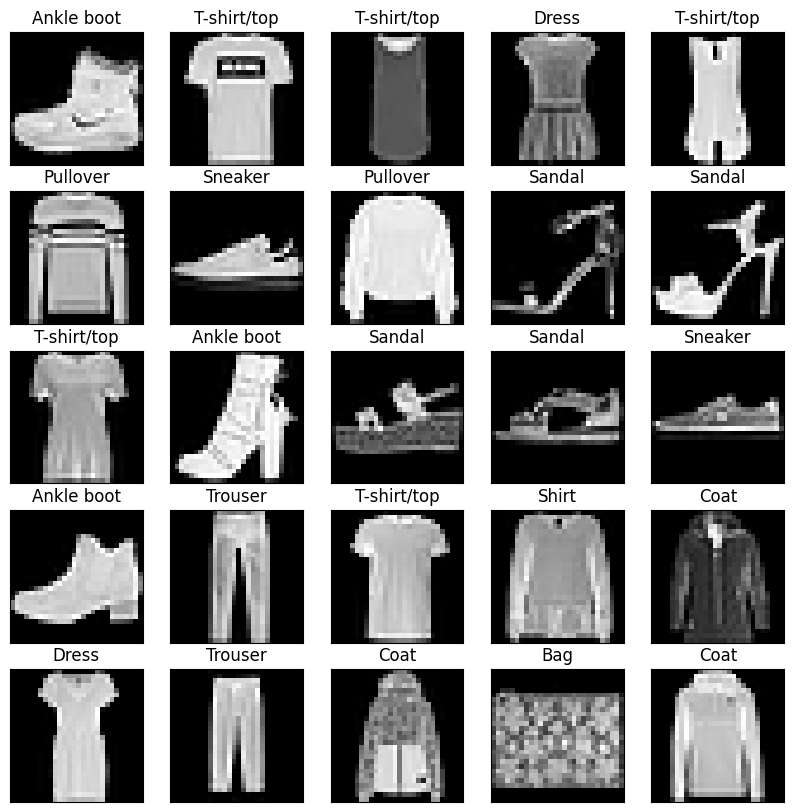

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (28,28,1) for CNN compatibility if needed
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some samples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()


In [8]:
# Build the model
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7670 - loss: 0.6682 - val_accuracy: 0.8372 - val_loss: 0.4846
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8571 - loss: 0.4038 - val_accuracy: 0.8569 - val_loss: 0.4046
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8747 - loss: 0.3513 - val_accuracy: 0.8665 - val_loss: 0.3782
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8819 - loss: 0.3267 - val_accuracy: 0.8631 - val_loss: 0.3918
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8895 - loss: 0.3011 - val_accuracy: 0.8735 - val_loss: 0.3454
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8912 - loss: 0.2975 - val_accuracy: 0.8654 - val_loss: 0.3726
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8987 - loss: 0.2777 - val_accuracy: 0.8653 - val_loss: 0.3713
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9026 - loss: 0.2659 - val_accuracy: 0.

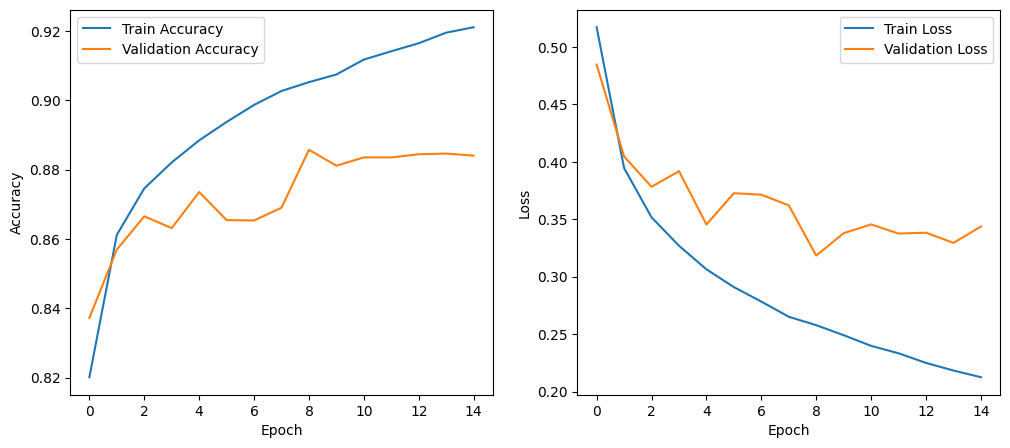

In [9]:
# Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.66      0.72      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000



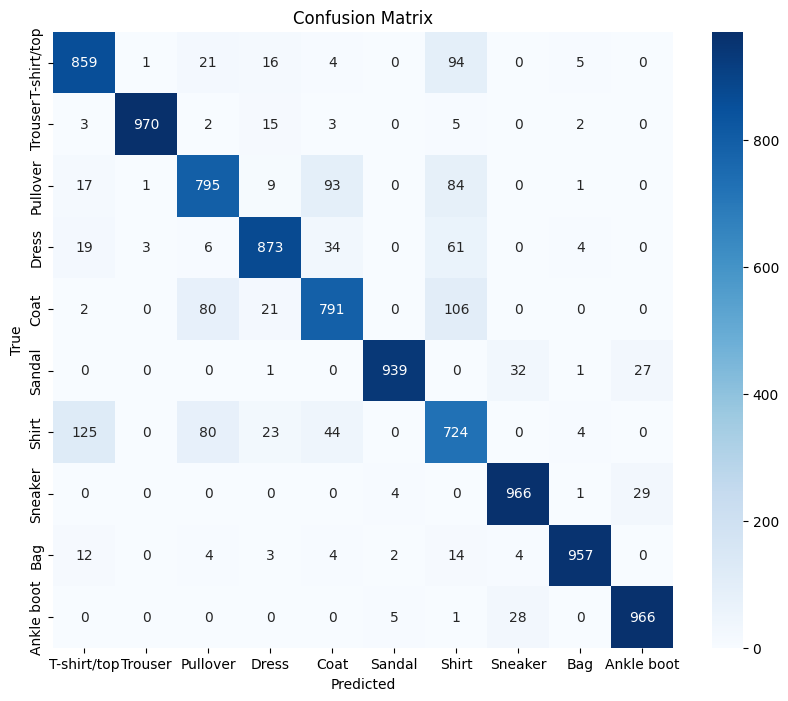

In [10]:
# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Conclusion & Future works

The feedforward neural network achieved approximately 77% accuracy on the Fashion MNIST test set, showing promising results for image classification tasks.

Future improvements include:
- Using Convolutional Neural Networks (CNNs) for spatial feature extraction.
- Applying data augmentation techniques to improve generalization.
- Experimenting with different architectures and optimizers.
- Deploying the model on mobile or web platforms for real-time applications.


# Neural Network Image Classification - Fashion MNIST

## Project Overview

This project demonstrates the implementation of a simple feedforward neural network to classify images from the Fashion MNIST dataset. The goal is to explore the capabilities of deep learning for image classification tasks and compare it to traditional machine learning.

The dataset consists of 70,000 grayscale images of 10 different fashion categories, such as T-shirts, dresses, and sneakers.


## Dataset

- Fashion MNIST dataset from [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)
- 28x28 grayscale images
- 10 classes


## Model Architecture

- Input layer flattening the 28x28 image into a vector
- One hidden Dense layer with 128 neurons and ReLU activation
- Output Dense layer with 10 neurons and Softmax activation for classification


## Training Details

- Optimizer: Adam
- Loss Function: Sparse Categorical Crossentropy
- Metrics: Accuracy
- Epochs: 15
- Batch size: 64


## Results

- Achieved approximately 77% accuracy on the test set
- Classification report and confusion matrix included for detailed evaluation


## How to Run

1. Clone the repository:
